### Практическая работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('3.10_non_linear.csv')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


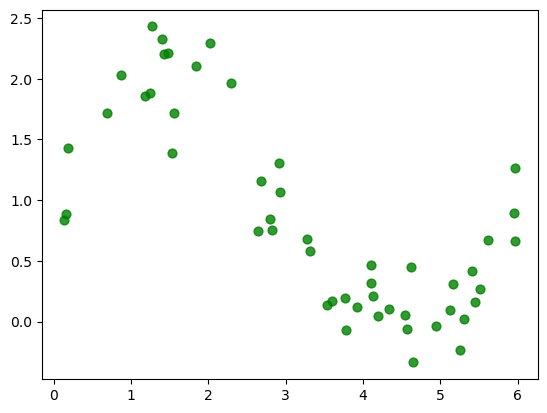

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8)
plt.show()

In [3]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [8]:
from sklearn.metrics import mean_squared_error

def train_polynomial(degree, data):
    """Генерим данные, тренируем модель
    
    дополнительно рисуем график
    """
    
    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)

    error = mean_squared_error(data['y_train'], y_pred)
    print("Степень полинома %d Ошибка %.3f" % (degree, error))
    r_score = r2_score(data['y_train'], y_pred)
    print('R2 = ', r_score)

    plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
    plt.plot(data['x_train'], y_pred)

Степень полинома 1 Ошибка 0.307
R2 =  0.5194693682784115
Степень полинома 2 Ошибка 0.298
R2 =  0.5334743428787219
Степень полинома 3 Ошибка 0.071
R2 =  0.8884043369162162
Степень полинома 4 Ошибка 0.067
R2 =  0.8954938957170192
Степень полинома 5 Ошибка 0.067
R2 =  0.8955568441439695
Степень полинома 6 Ошибка 0.064
R2 =  0.8993403708180602
Степень полинома 7 Ошибка 0.064
R2 =  0.9004609754024385
Степень полинома 8 Ошибка 0.058
R2 =  0.9086556247250599
Степень полинома 9 Ошибка 0.058
R2 =  0.9088071215143865
Степень полинома 10 Ошибка 0.058
R2 =  0.9091133831297872


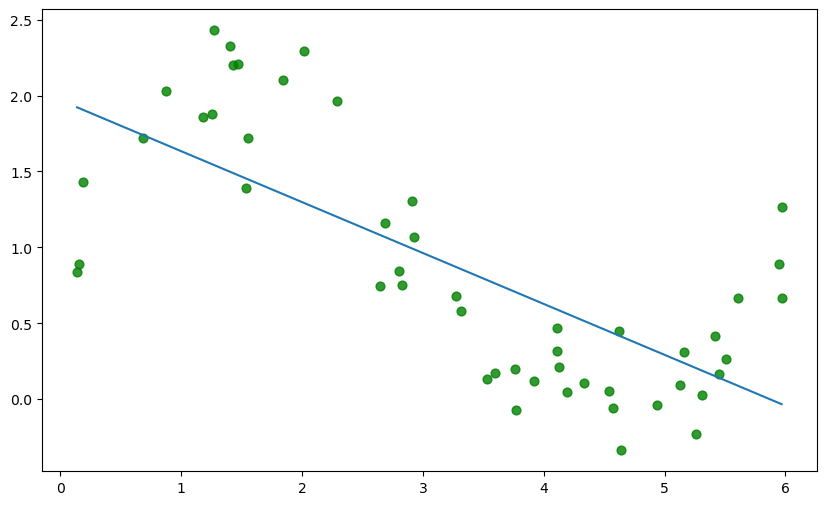

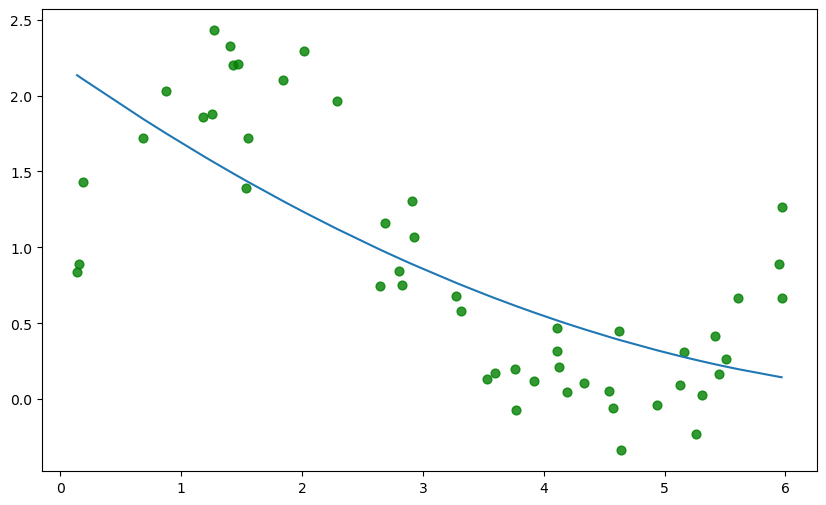

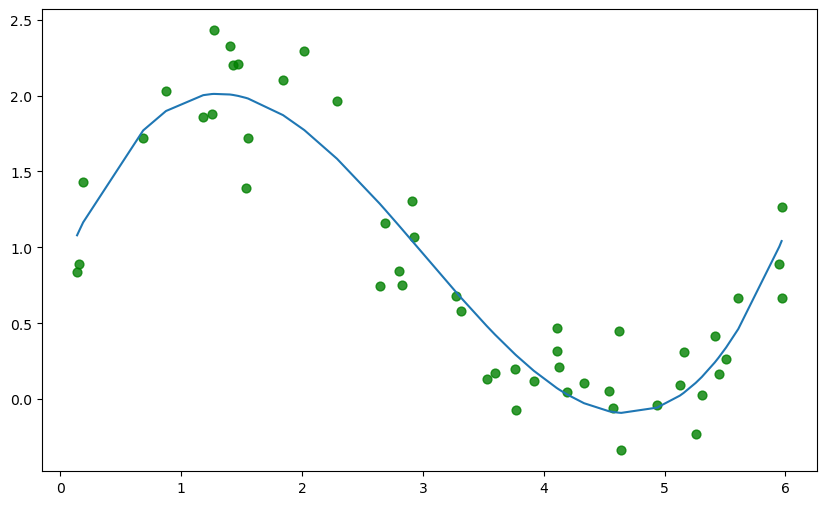

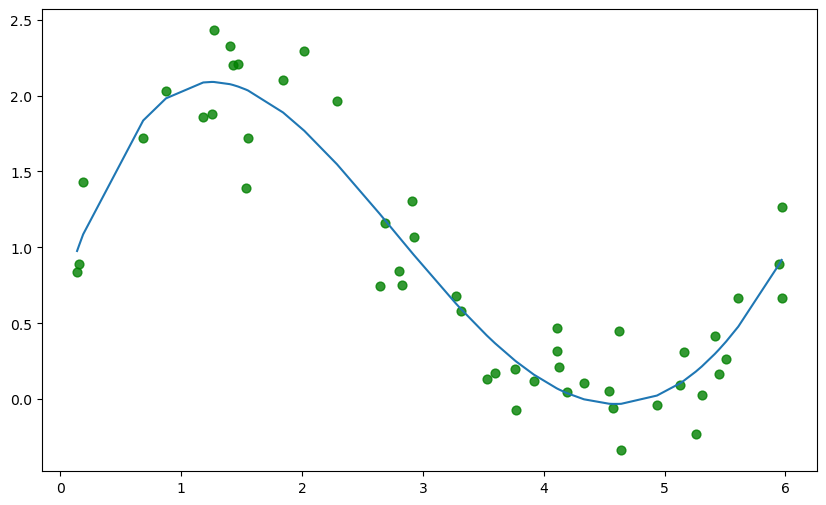

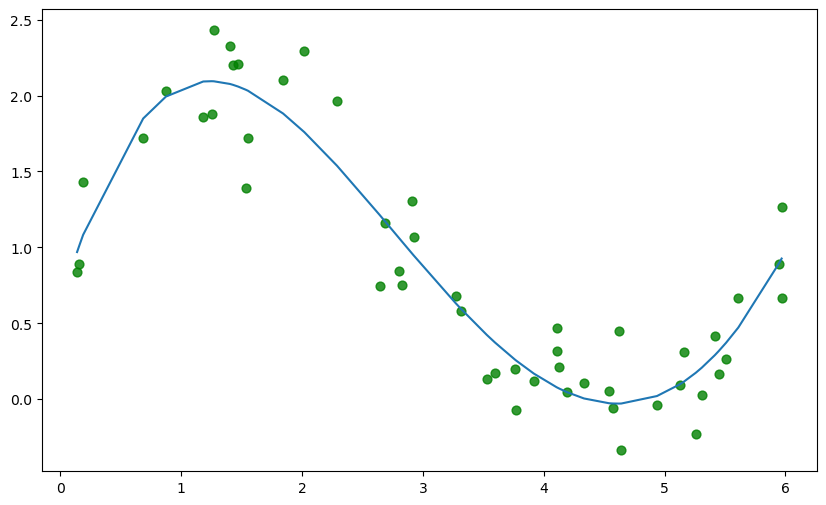

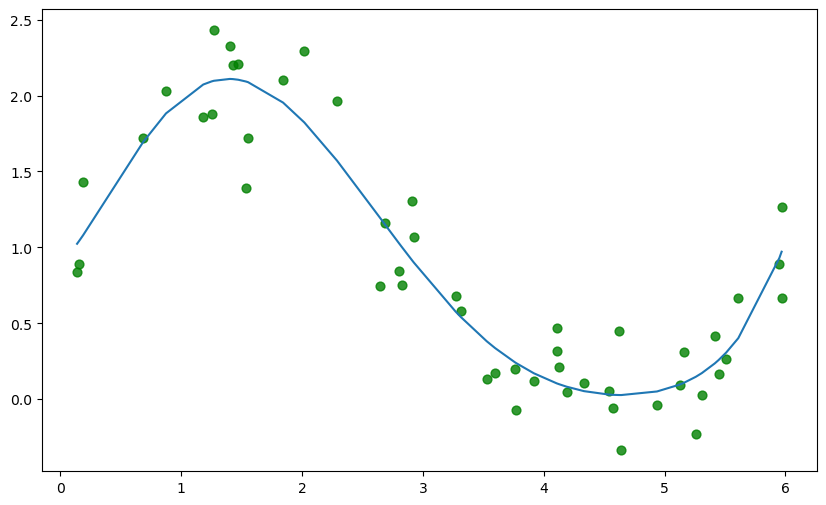

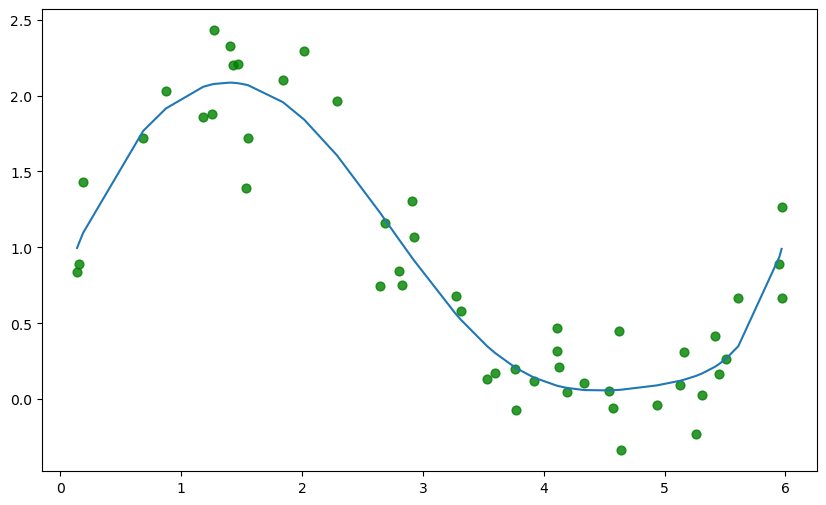

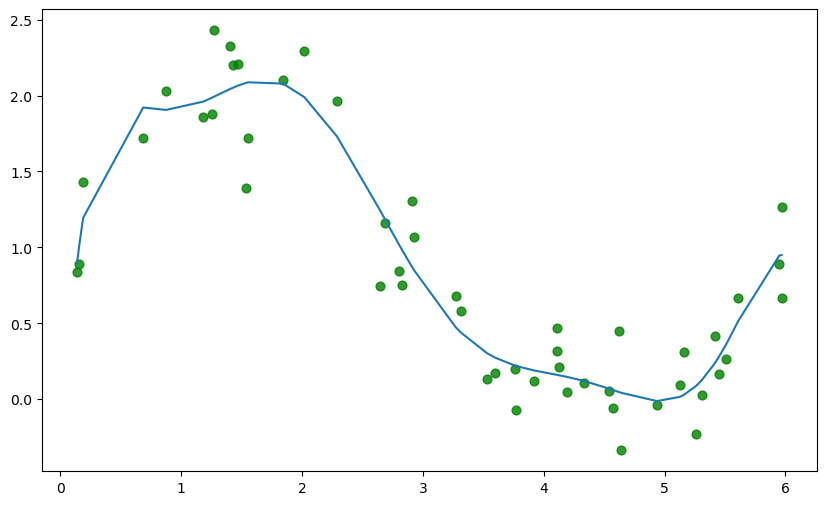

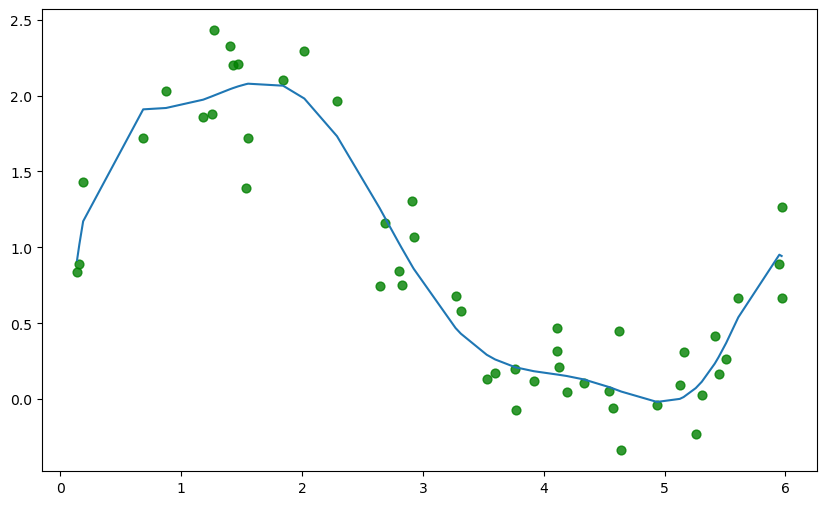

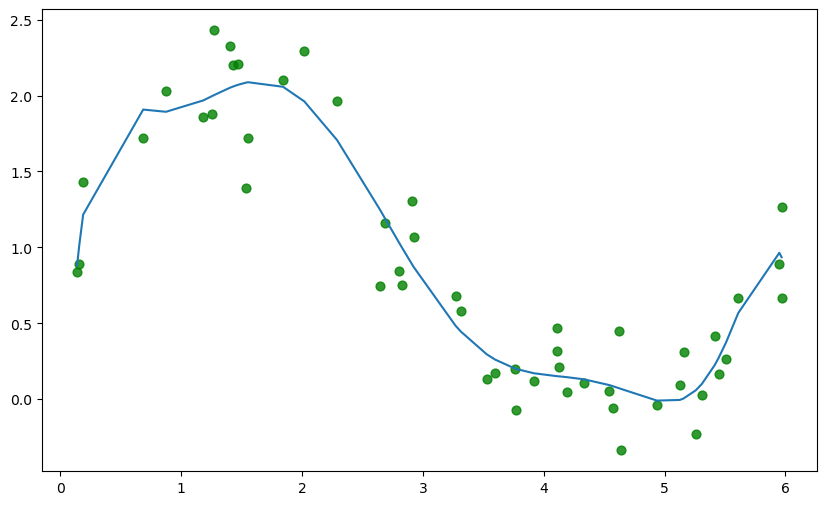

In [9]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
for i in range(1, 11):
    fig = plt.figure(figsize=(10,6))
    ax = plt.axes()
    train_polynomial(i, data)

Степень полинома 3 наиболее подходящая.

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [10]:
class CustomLinearReg:
    #def __init__(self, X, y):
        #self.X = np.array([[1, X[i]] for i in range(len(X))])
        #self.y = np.array([[y[i]] for i in range(len(y))])
        #pass
    
    def fit(X, y):
        from numpy.linalg import inv
        X = np.array([[1, X[i]] for i in range(len(X))])
        y = np.array([[y[i]] for i in range(len(y))])
        w = inv(X.T.dot(X)).dot(X.T).dot(y)
        return w
    
    def predict(X, y):
        from numpy.linalg import inv
        X = np.array([[1, X[i]] for i in range(len(X))])
        y = np.array([[y[i]] for i in range(len(y))])
        w = inv(X.T.dot(X)).dot(X.T).dot(y)
        y_pred = w[0][0] + w[1][0] * X
        return y_pred

In [12]:
CustomLinearReg.fit(data['x_train'], data['y_train'])

array([[ 1.96903541],
       [-0.33531472]])

In [13]:
CustomLinearReg.predict(data['x_train'], data['y_train'])

array([[ 1.63372068,  1.92263843],
       [ 1.63372068,  1.91631157],
       [ 1.63372068,  1.9057668 ],
       [ 1.63372068,  1.73915947],
       [ 1.63372068,  1.67589087],
       [ 1.63372068,  1.57255215],
       [ 1.63372068,  1.54935366],
       [ 1.63372068,  1.5430268 ],
       [ 1.63372068,  1.49873878],
       [ 1.63372068,  1.49030296],
       [ 1.63372068,  1.47554029],
       [ 1.63372068,  1.45445075],
       [ 1.63372068,  1.44812389],
       [ 1.63372068,  1.35111203],
       [ 1.63372068,  1.29206133],
       [ 1.63372068,  1.20137633],
       [ 1.63372068,  1.08327494],
       [ 1.63372068,  1.06851226],
       [ 1.63372068,  1.0305511 ],
       [ 1.63372068,  1.02211529],
       [ 1.63372068,  0.99258994],
       [ 1.63372068,  0.98837203],
       [ 1.63372068,  0.87237959],
       [ 1.63372068,  0.85761691],
       [ 1.63372068,  0.78591249],
       [ 1.63372068,  0.76271401],
       [ 1.63372068,  0.70788121],
       [ 1.63372068,  0.70366331],
       [ 1.63372068,

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [15]:
# делим датасет
X_train, X_valid, y_train, y_valid = train_test_split(data['x_train'], data['y_train'], train_size = 0.8, shuffle=True)
#y_valid

In [16]:
#обучение модели
X_train = list(X_train)
X_train = np.array([[1, X_train[i]] for i in range(len(X_train))])
model = LinearRegression().fit(X_train, y_train)

In [17]:
#предсказание модели
X_valid = list(X_valid)
X_valid = np.array([[1, X_valid[i]] for i in range(len(X_valid))])
y_pred = model.predict(X_valid)
y_pred

array([1.83424347, 0.53763557, 0.27988802, 0.18938124, 0.60256434,
       0.58288895, 1.43286561, 0.9783642 , 1.49582684, 0.44712879])

In [18]:
#r-score
r_coef = r2_score(y_valid, y_pred)
r_coef

0.6868478756591633

In [19]:
#z-преобразование
from sklearn.preprocessing import StandardScaler
data_trnsfd = StandardScaler().fit_transform(data)

In [20]:
# 2-4
X_train, X_valid, y_train, y_valid = train_test_split(data['x_train'], data['y_train'], train_size = 0.8, shuffle=True)
X_train = list(X_train)
X_train = np.array([[1, X_train[i]] for i in range(len(X_train))])
model = LinearRegression().fit(X_train, y_train)
X_valid = list(X_valid)
X_valid = np.array([[1, X_valid[i]] for i in range(len(X_valid))])
y_pred = model.predict(X_valid)
r_coef = r2_score(y_valid, y_pred)
r_coef

0.409072606650846